# Plotting a White Noise Process

Suppose we wan to simulate and plot white noise process $\epsilon_0, \epsilon_1,...,\epsilon_T$, where each draw $\epsilon_t$ is independant standard normal.

We'll do this several ways.

## Version 1

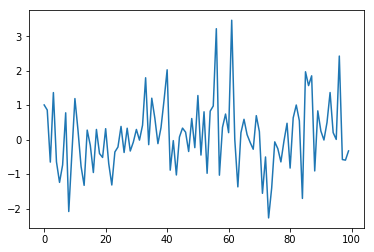

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
plt.plot(x)
plt.show()

In [3]:
np.sqrt(4)

2.0

In [5]:
import numpy
numpy.sqrt(4)

2.0

In [6]:
from numpy import sqrt
sqrt(4)

2.0

## Version 2

Another version that uses `for` loops and Python lists

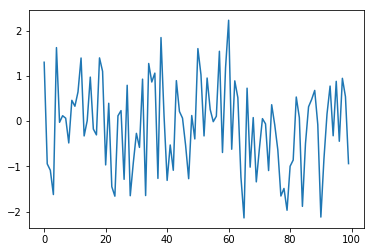

In [7]:
ts_length = 100
ε_values = []

for i in range(ts_length):
    e = np.random.randn()
    ε_values.append(e)
    
plt.plot(ε_values)
plt.show()

In [9]:
x = [10,'asd',False]
type(x)

list

In [10]:
x

[10, 'asd', False]

In [11]:
x.append(2.5)
x

[10, 'asd', False, 2.5]

In [12]:
x

[10, 'asd', False, 2.5]

In [13]:
x.pop()

2.5

In [14]:
x

[10, 'asd', False]

In [17]:
x[0]

10

In [18]:
x[1]

'asd'

In [22]:
animals =['dog','cat','bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal +"s.")

The plural of dog is dogs.
The plural of cat is cats.
The plural of bird is birds.


### While loops

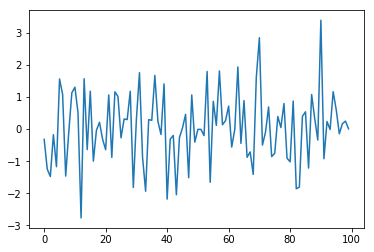

In [26]:
ts_length = 100
ε_values = []
i = 0

while i < ts_length:
    e = np.random.randn()
    ε_values.append(e)
    # i = i + 1
    i += 1
    
plt.plot(ε_values)
plt.show()

### User-defined functions

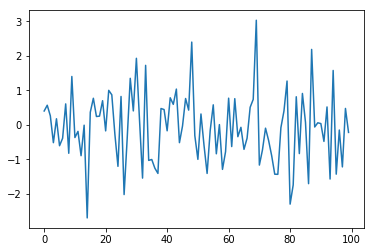

In [27]:
def generate_data(n):
    ε_values = []

    for i in range(ts_length):
        e = np.random.randn()
        ε_values.append(e)
        
    return ε_values

data = generate_data(100)
plt.plot(data)
plt.show()

### Conditons

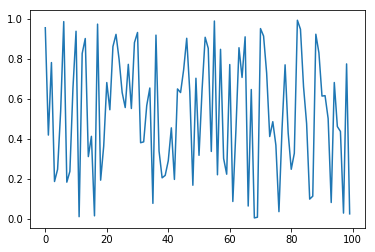

In [28]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        if generator_type == 'U':
            e = np.random.uniform()
        else:
            e = np.random.randn()
        
        ε_values.append(e)
        
    return ε_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

Passing a function insteadof a flag:

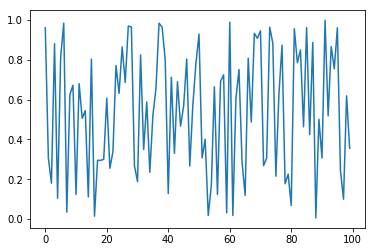

In [29]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        e = generator_type()
        ε_values.append(e)
        
    return ε_values

# data = generate_data(100, np.random.randn)
data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

In [30]:
max(2,7,5)

7

In [31]:
m = max
m(2,7,5)

7

### List Comprehensions

In [33]:
animals = ['dog','cat','bird']
plurals = [ animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

In [37]:
range(8)

range(0, 8)

So in python3, `range()` is lazy evaluated. In python2 it would have returned `[0,1,2,3,4,5,6,7]`
To force evaluation call `list(range())`

In [39]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [35]:
doubles = [ 2 * x for x in range(8)]

In [36]:
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

We can therefor simplify

In [44]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        e = generator_type()
        ε_values.append(e)
        
    return ε_values



Into

In [45]:
def generate_data(n, generator_type):
    
    ε_values = [ generator_type() for i in range(n) ]

    return ε_values

## Excersises

#### Exercise 1

Recall that $n$! is read as “n factorial” and defined as $n!=n×(n−1)×⋯×2×1$

There are functions to compute this in various modules, but let’s write our own version as an exercise

In particular, write a function `factorial` such that `factorial(n)` returns $n$!
for any positive integer $n$

In [47]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
        
factorial(4)

24

#### Exercise 2

The binomial random variable $Y∼Bin(n,p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$

Without any import besides `from numpy.random import uniform`, write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$

Hint: If $U$
is uniform on (0,1) and $p$ ∈ (0,1), then the expression `U < p` evaluates to `True` with probability $p$

In [56]:
from numpy.random import uniform

def binomial(n,p):
    count = 0
    for i in range(n):
        u = uniform()
        if u < p:
            count = count + 1
            
    return count

binomial(100,0.5)
        

47

In [57]:
np.random.binomial(100,0.5)

38

In [58]:
binomial(100,0.2)

21

In [59]:
np.random.binomial(100,0.2)

17

#### Exercise 3

Compute an approximation to $\pi$

using Monte Carlo. Use no imports besides

```
import numpy as np
```

Your hints are as follows:

* If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$
* If $U_1,…,U_n$ are iid copies of $U$, then, as $n$ gets large, the fraction that fall in $B$ converges to the probability of landing in $B$
* For a circle, area = pi * radius^2